## Imports, constants

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [2]:
epochs = 5
batch_size = 32
num_classes = 10
input_x_y = (28, 28)
input_shape = (28, 28, 1)

## Getting the data

In [3]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_X.shape, train_Y.shape

((60000, 28, 28), (60000,))

In [5]:
test_X.shape, test_Y.shape

((10000, 28, 28), (10000,))

## Show a few images from the training set

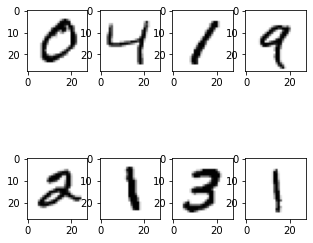

In [6]:
w = 10
h = 10
rows = 2
columns = 4
fig = plt.figure(figsize=(5, 5))

for i in range(1, columns * rows + 1):
    digit = train_X[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

## Preparing the data & labels

In [7]:
train_X = train_X.astype('float32') / 255
train_X = np.expand_dims(train_X, -1)

In [8]:
test_X = test_X.astype('float32') / 255
test_X = np.expand_dims(test_X, -1)

In [9]:
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
# to_categorical: converts class vector to binary class matrix, used with categorical_crossentropy

train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [11]:
train_Y.shape, test_Y.shape

((60000, 10), (10000, 10))

In [12]:
train_Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating our CNN model

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(
    64, 
    kernel_size=3,    
    activation='relu',
    input_shape=input_shape
))

model.add(layers.Conv2D(
    32, 
    kernel_size=3,    
    activation='relu'
))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.25))

model.add(layers.Dense(
   units=128,
   activation='relu'
))

model.add(layers.Dropout(0.50))

model.add(layers.Dense(
    units=num_classes, # output units
    activation='softmax'
))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
model.compile(
    optimizer='adam', # How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. 
    loss='categorical_crossentropy', # The mechanism through which the network will update itself based on the data it sees and its loss function. 
    metrics=['accuracy'] # To monitor during training and testing
)

## Training the model

In [16]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size, verbose=0)

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluationg the model

In [18]:
test_loss, test_acc = model.evaluate(test_X, test_Y)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9891


0.9890999794006348

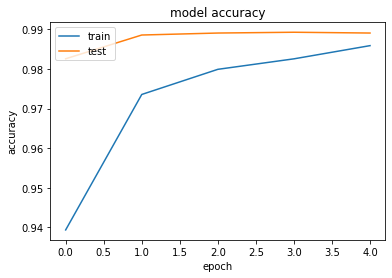

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

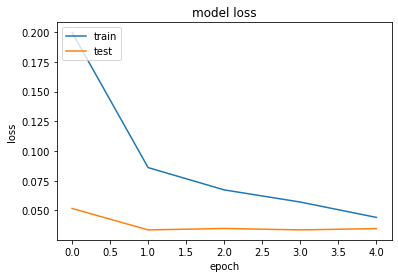

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Validate with some test images

Prediction: 2. Actual: 2. Image: 5983


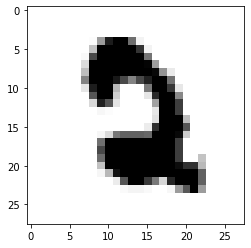

Prediction: 3. Actual: 3. Image: 2431


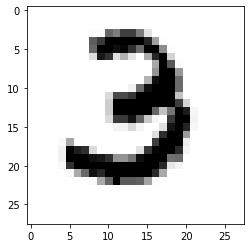

Prediction: 8. Actual: 8. Image: 6404


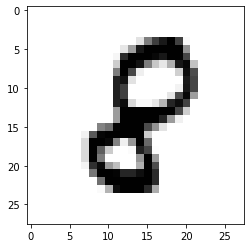

In [21]:
# validate from test images

random_test = np.random.randint(test_X.shape[0], size=3)
random_test_sample = test_X[random_test, :]
random_test_labels = test_Y[random_test, :]

predictions = model.predict(random_test_sample)
for pred, label, samp in zip(predictions, random_test_labels, random_test):
  print('Prediction: %s. Actual: %s. Image: %s' % (str(np.argmax(pred)), list(label).index(1), samp))
  digit = np.reshape(test_X[samp], input_x_y)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()  

## Saving the model

In [22]:
model.save('mnist.h5')